# Module 4: Simple decision tree classifier

The goal of this demo is to show how to train a machine learning algorithm. 

I chose the decision trees in this example as it allows us to look inside the resulting tree -- we can see what the algorithm has learnt. 

Python is a very good toolkit for ML for desktop applications. Together with R, they are the state-of-the-art, especially for the applications like ours, where we have desktop-grade computers and where we do not high performance or embedded systems.

In [68]:
# sklearn toolkit provides the basic machine learning libraries
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

from IPython.display import Image  
from sklearn import tree
import pydotplus

from sklearn.model_selection import cross_val_score

In [69]:
# get the data from the lecture, a ery simple data frame
datasetDF = pd.read_csv('./Dataset-community-smells -Features_small_train.csv', sep=";")

In [70]:
datasetDF

,ID,NoD,TAP,LCP,SLC,DC,SDC,BC,CC,TZ,Class
0,apache/mahut,44,15.95,2.2727,176.83,0.008447,0.1630,2.550000e-04,22,10,OK
1,apache/cassandra,348,7.30,0.2873,401.00,0.002180,0.1800,3.000000e-08,194,20,OK
2,apache/lucene-solr,181,12.83,0.5500,427.00,0.003280,0.2230,2.900000e-07,105,19,OK
3,apache/pig,32,23.13,3.1250,216.00,0.204000,0.2145,2.000000e-05,19,1,FAULT_PRONE
4,apache/jackrabbit,49,22.00,3.5600,429.56,0.130000,0.2250,6.500000e-06,29,1,FAULT_PRONE
5,apache/jena,66,14.08,1.4400,642.00,0.012220,0.1837,2.800000e-05,37,15,FAULT_PRONE
6,eclipse/cdt,249,9.28,0.4000,356.16,0.002700,0.1465,5.400000e-07,131,14,FAULT_PRONE


In [71]:
# list of columns
datasetDF.columns

Index(['ID', 'NoD', 'TAP', 'LCP', 'SLC', 'DC', 'SDC', 'BC', 'CC', 'TZ',
       'Class'],
      dtype='object')

In [72]:
# create the data
X = datasetDF[['NoD', 'TAP', 'LCP', 'SLC', 'DC', 'SDC', 'BC', 'CC', 'TZ']]
y = datasetDF['Class']

In [73]:
# Create decision tree classifer object using gini
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

In [74]:
# Train model
model = clf.fit(X, y)

## Visualization of the tree

The big advantage of decision trees, compared to many other algorithms, is that we can visualize it in an intuitive way.

The visualization is intuitive because we can see how the decisions in the tree are made. 

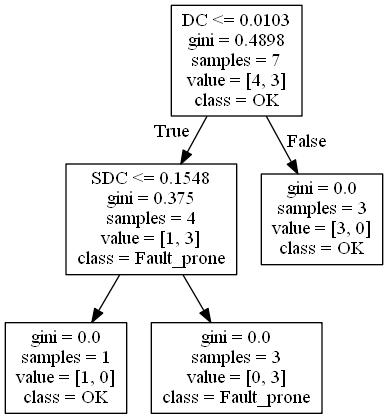

In [75]:
# Create the texttual description of the graph, which can be used for the 
# pydotplus to draw the diagram
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=X.columns,
                                class_names=['OK', 'Fault_prone'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## Using the trained model -- classifying new instances

Now we have trained the model based on the data to train. We can use this model to classify new instances. 

In [76]:
# read the data with the instances to classify
# get the data from the lecture, a ery simple data frame
classifyDF = pd.read_csv('./Dataset-community-smells -Features_small_predict.csv', sep=";", index_col=False)

In [77]:
classifyDF

,ID,NoD,TAP,LCP,SLC,DC,SDC,BC,CC,TZ
0,ApacheDrill,178,10.1030,0.5494,42.000,0.022000,0.152200,1.700000e-04,51.00000,14
1,ganttproject,31,9.8000,3.2200,485.000,0.182700,0.167000,2.430000e-04,14.00000,8
2,qemu/qemu,1613,8.1000,0.0710,251.000,0.000530,0.157000,5.000000e-07,869.00000,25
3,nginx/ngin,62,8.1000,1.5800,490.000,0.012700,0.236000,3.400000e-05,34.00000,12
4,bitcoin/bitcoin,739,5.3000,0.1320,235.850,0.001190,0.113000,2.000000e-08,389.00000,29
5,python/cpython,779,0.0450,0.1200,632.200,0.000950,0.138000,1.000000e-08,430.00000,22
6,liferay,20,19.0000,0.3700,12.300,0.255000,0.249000,7.000000e-04,13.00000,10
7,Thepracticaldev,82,0.1040,0.0800,5.120,0.004400,0.175000,6.000000e-06,60.00000,17
8,floweisshardt/atf,10,0.1215,10.6700,203.160,0.070000,0.195000,6.560000e-04,3.37000,3
9,eclipse/b3,9,19.4000,19.6600,96.670,0.044000,0.240000,1.900000e-03,4.74000,5


In [79]:
print(f'Train data columns: {datasetDF.columns}')
print(f'Predict data columns: {classifyDF.columns}')

Train data columns: Index(['ID', 'NoD', 'TAP', 'LCP', 'SLC', 'DC', 'SDC', 'BC', 'CC', 'TZ',
       'Class'],
      dtype='object')
Predict data columns: Index(['ID', 'NoD', 'TAP', 'LCP', 'SLC', 'DC', 'SDC', 'BC', 'CC', 'TZ'], dtype='object')


When we look at the two lists above, we see that the predict data set does not have any "class" column in the predict data set

In [80]:
X_to_classify = classifyDF[['NoD', 'TAP', 'LCP', 'SLC', 'DC', 'SDC', 'BC', 'CC', 'TZ']]

In [81]:
# Using the model is very simple, we just ask it to produce the predictions for us
y_to_predict = clf.predict(X_to_classify)

In [82]:
# let's check how the predictions look like
y_predicted = pd.DataFrame(y_to_predict)
y_predicted.columns=['class']
y_predicted.head()

,class
0,FAULT_PRONE
1,FAULT_PRONE
2,OK
3,FAULT_PRONE
4,FAULT_PRONE


In [83]:
classifiedDF = pd.concat([classifyDF['ID'], X_to_classify, y_predicted], axis=1)
classifiedDF.head()

,ID,NoD,TAP,LCP,SLC,DC,SDC,BC,CC,TZ,class
0,ApacheDrill,178,10.103,0.5494,42.00,0.02200,0.1522,1.700000e-04,51.0,14,FAULT_PRONE
1,ganttproject,31,9.800,3.2200,485.00,0.18270,0.1670,2.430000e-04,14.0,8,FAULT_PRONE
2,qemu/qemu,1613,8.100,0.0710,251.00,0.00053,0.1570,5.000000e-07,869.0,25,OK
3,nginx/ngin,62,8.100,1.5800,490.00,0.01270,0.2360,3.400000e-05,34.0,12,FAULT_PRONE
4,bitcoin/bitcoin,739,5.300,0.1320,235.85,0.00119,0.1130,2.000000e-08,389.0,29,FAULT_PRONE


In [84]:
# finally, let's save the data into the .csv file
classifiedDF.to_csv('./community_smells_classified.csv', sep=';')

## Let's just check how many instances were classified to each of the classes

class
FAULT_PRONE    75
OK             21
Name: ID, dtype: int64


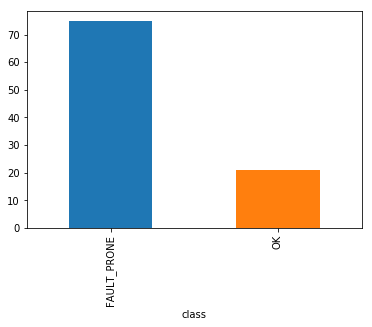

In [85]:
# first we group the items per class
groupedDF = classifiedDF.groupby('class').count()

print(groupedDF['ID'])

# and we visualize them in a bar chart
groupedDF['ID'].plot.bar()

## Additional material

For the visualization please take a look here: https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/

## Important notes

This workbook has a few simplifications, which we need to tackle in a real world scenario. 
1. We did not use any validation of the tree -- this is because the training data is so small that it's difficult to divide it into a smaller chunk. 
2. We did not balanced the classes -- since we have three items in the OK class and four in the FAULT_PRONE class, we do not need to balance the classes. This is again, by design as I did not want to clutter the basic code here. 